# EE 658/758 Machine Learning in Engineering (Spring 2022)

# Assignment #1: Linear Regression
## DUE DATE: Monday, February 7, 2022

# Predicting the Amount of Money Spent on Insured Customers 

### For this assignment, we will be analyzing insured customers' data for an insurance company:
**Based on a sample data that consists of the profile of insured customers, we want to be able to predict the dollar amount of money spent by the insurance company on insured customers.**

### Insured ustomers' Data
The insured customers' data is in a csv file. It has information sconsisting of:
1. age
2. sex (female, male)
3. bmi
4. children
5. smoker (yes, no)
6. region (northeast, northwest, southeast, southwest])
7. **expenses**

The value we want to predict is **expenses**


## 1. Import the Libraries:
1. numpy
2. matplotlib.pyplot
3. pandas

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2. Read the csv file: "Insurance Customers Data"

In [110]:
data_path = "C:/Users/emmasch/EE658 PYTHON/insurance.csv"
df= pd.read_csv(data_path)

## 3. Show a sample of the data (first 10 rows)

In [111]:
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


## 4. Show some statistics about the data (describe())

In [112]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


## 5. Show info about the data (info())

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 6. Convert the columns with text data into numeric data

In [114]:
type(df)
columnTypes = dict(df.dtypes)
objectColumns = df.dtypes[df.dtypes == object]
text_to_num = list(objectColumns.index)
print(text_to_num)

['sex', 'smoker', 'region']


In [115]:
df["Female"]=df.sex.copy(deep=True)
df["Male"]=df.sex.copy(deep=True)
df["Yes_Smoke"]=df.smoker.copy(deep=True)
df["No_Smoke"]=df.smoker.copy(deep=True)
df["SW"]=df.region.copy(deep=True)
df["SE"]=df.region.copy(deep=True)
df["NW"]=df.region.copy(deep=True)
df["NE"]=df.region.copy(deep=True)
df.head(5)

,age,sex,bmi,children,smoker,region,expenses,Female,Male,Yes_Smoke,No_Smoke,SW,SE,NW,NE
0,19,female,27.9,0,yes,southwest,16884.92,female,female,yes,yes,southwest,southwest,southwest,southwest
1,18,male,33.8,1,no,southeast,1725.55,male,male,no,no,southeast,southeast,southeast,southeast
2,28,male,33.0,3,no,southeast,4449.46,male,male,no,no,southeast,southeast,southeast,southeast
3,33,male,22.7,0,no,northwest,21984.47,male,male,no,no,northwest,northwest,northwest,northwest
4,32,male,28.9,0,no,northwest,3866.86,male,male,no,no,northwest,northwest,northwest,northwest


In [116]:
df.head(5)
#dont want to create an illusion of a hierarchy
#if it is true = 1 if not=0 
#you are either this color or you are not -- give independence to the values for regression

df.Female.replace(["female","male"],[1,0], inplace=True)
df.Male.replace(["female","male"],[0,1], inplace=True)
df.Yes_Smoke.replace(["yes", "no"], [1,0], inplace=True)
df.No_Smoke.replace(["yes", "no"], [0,1], inplace=True)
df.SW.replace(["northeast", "northwest", "southeast", "southwest"], [0,0,0,1], inplace=True)
df.SE.replace(["northeast", "northwest", "southeast", "southwest"], [0,0,1,0], inplace=True)
df.NW.replace(["northeast", "northwest", "southeast", "southwest"], [0,1,0,0], inplace=True)
df.NE.replace(["northeast", "northwest", "southeast", "southwest"], [1,0,0,0], inplace=True)
#drop the column to reduce complexity
df.head(5)



,age,sex,bmi,children,smoker,region,expenses,Female,Male,Yes_Smoke,No_Smoke,SW,SE,NW,NE
0,19,female,27.9,0,yes,southwest,16884.92,1,0,1,0,1,0,0,0
1,18,male,33.8,1,no,southeast,1725.55,0,1,0,1,0,1,0,0
2,28,male,33.0,3,no,southeast,4449.46,0,1,0,1,0,1,0,0
3,33,male,22.7,0,no,northwest,21984.47,0,1,0,1,0,0,1,0
4,32,male,28.9,0,no,northwest,3866.86,0,1,0,1,0,0,1,0


## 7. wich features of the input data have the strongest correlations?

In [117]:
#clean up dataframe before calling corrs
df.drop(['region','sex', 'smoker'], axis=1, inplace=True)
df.head(5)

,age,bmi,children,expenses,Female,Male,Yes_Smoke,No_Smoke,SW,SE,NW,NE
0,19,27.9,0,16884.92,1,0,1,0,1,0,0,0
1,18,33.8,1,1725.55,0,1,0,1,0,1,0,0
2,28,33.0,3,4449.46,0,1,0,1,0,1,0,0
3,33,22.7,0,21984.47,0,1,0,1,0,0,1,0
4,32,28.9,0,3866.86,0,1,0,1,0,0,1,0


In [118]:
pd.get_dummies(df["Male"])
pd.get_dummies(df["Female"])
pd.get_dummies(df["Yes_Smoke"])
pd.get_dummies(df["No_Smoke"])
df.info()
#they all appear to be int64 anyway? When is get dummies nessesary?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   expenses   1338 non-null   float64
 4   Female     1338 non-null   int64  
 5   Male       1338 non-null   int64  
 6   Yes_Smoke  1338 non-null   int64  
 7   No_Smoke   1338 non-null   int64  
 8   SW         1338 non-null   int64  
 9   SE         1338 non-null   int64  
 10  NW         1338 non-null   int64  
 11  NE         1338 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 125.6 KB


In [119]:
#correlation will show positive or inverse relationships as well as the strength between them
# sort through the correlation matrix for the largest absolute values
corr = df.corr()
all_corr = corr.abs().unstack().drop_duplicates()
#all_corr.sort_values(ascending = False)
print(corr)
print(all_corr)

                age       bmi  children  expenses    Female      Male  \
age        1.000000  0.109341  0.042469  0.299008  0.020856 -0.020856   
bmi        0.109341  1.000000  0.012645  0.198576 -0.046380  0.046380   
children   0.042469  0.012645  1.000000  0.067998 -0.017163  0.017163   
expenses   0.299008  0.198576  0.067998  1.000000 -0.057292  0.057292   
Female     0.020856 -0.046380 -0.017163 -0.057292  1.000000 -1.000000   
Male      -0.020856  0.046380  0.017163  0.057292 -1.000000  1.000000   
Yes_Smoke -0.025019  0.003968  0.007673  0.787251 -0.076185  0.076185   
No_Smoke   0.025019 -0.003968 -0.007673 -0.787251  0.076185 -0.076185   
SW         0.010016 -0.006398  0.021914 -0.043210  0.004184 -0.004184   
SE        -0.011642  0.270144 -0.023066  0.073982 -0.017117  0.017117   
NW        -0.000407 -0.135992  0.024806 -0.039905  0.011156 -0.011156   
NE         0.002475 -0.138091 -0.022808  0.006349  0.002425 -0.002425   

           Yes_Smoke  No_Smoke        SW        SE

## 8. Based on this data, what looks to be the most correlated feature with "Expenses"? (Justify your answer)

In [120]:
#focus_cols = ['expenses']
expense_corr = df.corr().filter(['expenses']).drop(['expenses'])
ex_1 = expense_corr.abs().unstack().drop_duplicates()
ex_1.sort_values(ascending = False)
##for some reason both smokers and non smokers have the same correlation to expenses?

expenses  No_Smoke     0.787251
          Yes_Smoke    0.787251
          age          0.299008
          bmi          0.198576
          SE           0.073982
          children     0.067998
          Female       0.057292
          Male         0.057292
          SW           0.043210
          NW           0.039905
          NE           0.006349
dtype: float64

** Refer to the customers features data by "X" **  
** Refer to the label feature (expenses) by "y" **

In [121]:
#call data X and expenses matrix y
X = df.copy()
X.info()
X.head(5)
X.drop(['expenses'], axis=1, inplace=True)
X.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   expenses   1338 non-null   float64
 4   Female     1338 non-null   int64  
 5   Male       1338 non-null   int64  
 6   Yes_Smoke  1338 non-null   int64  
 7   No_Smoke   1338 non-null   int64  
 8   SW         1338 non-null   int64  
 9   SE         1338 non-null   int64  
 10  NW         1338 non-null   int64  
 11  NE         1338 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 125.6 KB


,age,bmi,children,Female,Male,Yes_Smoke,No_Smoke,SW,SE,NW,NE
0,19,27.9,0,1,0,1,0,1,0,0,0
1,18,33.8,1,0,1,0,1,0,1,0,0
2,28,33.0,3,0,1,0,1,0,1,0,0
3,33,22.7,0,0,1,0,1,0,0,1,0
4,32,28.9,0,0,1,0,1,0,0,1,0


In [122]:
expenses = df["expenses"]
y = expenses.copy()
print(y)

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64


## 9. Load the train_test_split function

In [ ]:
from sklearn.model_selection import train_test_split


## 10. Split the data into:
1. a **training** data set, and
2. a **test** data set. 

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45) 

## 11. Import LinearRegression from sklearn.linear_model

In [124]:
from sklearn.linear_model import LinearRegression


## 12. Create an instance of a LinearRegression() model named lm

In [125]:
lm = LinearRegression()

## 13. Fit the model to the training data

In [142]:
lm.fit(X_train.values, y_train)

LinearRegression()

## 14. Print the linear model's intercept and coefficients

In [143]:
print('coefficient', lm.coef_)
print("intercept:",lm.intercept_)

#coefficient [   256.15971378    332.40460544    460.57599509    -43.16000322
#     43.16000322  12151.65769376 -12151.65769376   -274.43772345
#   -406.6874393     167.91977612    513.20538663]
#intercept: -101.18393383170041

coefficient [   256.15971378    332.40460544    460.57599509    -43.16000322
     43.16000322  12151.65769376 -12151.65769376   -274.43772345
   -406.6874393     167.91977612    513.20538663]
intercept: -101.18393383170041


## 15. Use the trained model to predict the test data set

In [144]:
predictions = lm.predict(X_test)
print(len(X_test))
print(type(predictions))
print(predictions.shape)
print(X_test.shape)
print(y_test.shape)
print(len(predictions))
print(len(y_test))
print(lm.score(X_test, y_test))
#check sizing and shapes to know what the model will be looking for when predicting
# also solve issue with plotting sizes

335
<class 'numpy.ndarray'>
(335,)
(335, 11)
(335,)
335
335
0.7065398681585913


## 16. Create a scatterplot of the real test values versus the predicted values.

Text(0, 0.5, 'Predictions')

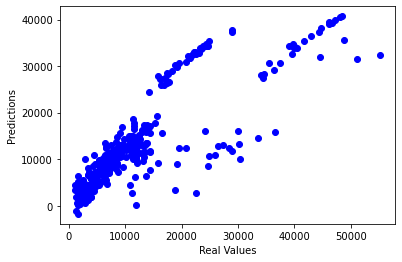

In [145]:
plt.scatter(y_test, predictions, c="b")
plt.xlabel("Real Values")
plt.ylabel("Predictions")

## 17. Calculate: 
1. the Mean Absolute Error, 
2. Mean Squared Error, and 
3. the Root Mean Squared Error.

In [146]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

#MAE: 4392.718904026637
#MSE: 37691827.564354874
#RMSE: 6139.367032875203

MAE: 4392.718904026637
MSE: 37691827.564354874
RMSE: 6139.367032875203


## 18. Show a histogram of the difference between the actual and predicted value of the test data set.


Text(0.5, 1.0, 'Predictions- Blue Vs Real - Red')

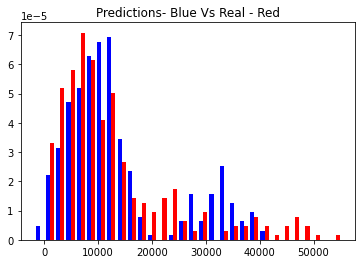

In [147]:
Predictions_DF = pd.DataFrame(predictions)
Y = pd.DataFrame(y_test)
Frames = [Predictions_DF, Y]
Final = pd.concat(Frames)
plt.hist(Final, density=True, bins=30, color=['blue', 'red'])
plt.title('Predictions- Blue Vs Real - Red')


## 19. Explain the meaning behind the coefficients of the model

In [148]:
# The coefficients represent the strength and the parallel or inverseness of a relationship between the independent and dependent variables. 
# Age is independent of expenses. No matter what the expense is, it does not effect age. But Expenses are dependent on age. 
# The coefficient of age will show if there is a positive or negative correlation with expenses. If it is positive, as age increases
# the expenses will also increase, and the opposite for negative. The value of the coefficient determines the strength of the correlation.
# The higher the coefficient, the stronger that independent variable effects the value of the dependent variable.

## 20. Create 3 records of input data and use the model to predict the cost associated with this data  

In [149]:
# we need to create 3 separate arrays with values for all the categories then use lm.predict(X_array)
print(list(X.columns))
ex1 = np.array([35, 20, 2, 0, 1, 0, 1, 0,0,1,0], dtype="int64").reshape(1,-1)
print(ex1.shape)# make sure it matches what we expect
ex2 = np.array([22,25, 0, 1, 0, 0, 1, 0,0,0,1], dtype="int64").reshape(1,-1)
ex3 = np.array([60, 23, 4, 0, 1, 1, 0, 0,1,0,0], dtype="int64").reshape(1,-1)

['age', 'bmi', 'children', 'Female', 'Male', 'Yes_Smoke', 'No_Smoke', 'SW', 'SE', 'NW', 'NE']
(1, 11)


In [177]:
# creating a stacked array to pass into dataframe structure to slap on column names
array = np.concatenate((ex1,ex2,ex3))
print(array)
New_Ex = pd.DataFrame(array,columns=list(X.columns))
New_Ex.head()

[[35 20  2  0  1  0  1  0  0  1  0]
 [22 25  0  1  0  0  1  0  0  0  1]
 [60 23  4  0  1  1  0  0  1  0  0]]


,age,bmi,children,Female,Male,Yes_Smoke,No_Smoke,SW,SE,NW,NE
0,35,20,2,0,1,0,1,0,0,1,0
1,22,25,0,1,0,0,1,0,0,0,1
2,60,23,4,0,1,1,0,0,1,0,0


In [181]:
Ex_Predictions = lm.predict(New_Ex)
print('The example senario\'s predicted expenses are', Ex_Predictions)

#The example senario's predicted expenses are [ 4493.07223287  2162.83259487 36544.13905587]

The example senario's predicted expenses are [ 4493.07223287  2162.83259487 36544.13905587]
